<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Tarefa_15_Reducao_Dimensionalidade_Restricted_Boltzmann_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM #implementacao das Restricted Boltzmann Machine
from sklearn.naive_bayes import GaussianNB #Estimativas de probabilidade
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

In [2]:
base = datasets.load_digits() #versao reduzida da base Mnist
base

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [3]:
previsores = np.asarray(base.data, 'float32')#converte a base para float 32
classe = base.target
classe, previsores

(array([0, 1, 2, ..., 8, 9, 8]), array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], dtype=float32))

In [4]:
normalizador = MinMaxScaler(feature_range = (0, 1))#normaliza os dados entre os valores 0 e 1
previsores = normalizador.fit_transform(previsores)#aplica a normalizacao
previsores

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]],
      dtype=float32)

In [5]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe,
                                                                                              test_size = 0.2,
                                                                                              random_state = 0)#divide a base de dados, o parametro random state é para sempre dividir a base da mesma forma
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste

(array([[0.    , 0.    , 0.    , ..., 1.    , 1.    , 0.375 ],
        [0.    , 0.375 , 0.75  , ..., 1.    , 0.125 , 0.    ],
        [0.    , 0.125 , 0.625 , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.25  , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.375 , ..., 0.6875, 0.    , 0.    ]],
       dtype=float32),
 array([[0.    , 0.    , 0.6875, ..., 0.8125, 1.    , 0.5   ],
        [0.    , 0.125 , 0.9375, ..., 0.0625, 0.    , 0.    ],
        [0.    , 0.25  , 0.8125, ..., 1.    , 1.    , 0.1875],
        ...,
        [0.    , 0.125 , 0.5625, ..., 0.25  , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.9375, 0.125 , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.75  , 0.    , 0.    ]],
       dtype=float32),
 array([6, 5, 3, ..., 7, 7, 8]),
 array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
        8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8

In [0]:
rbm = BernoulliRBM(random_state = 0)
rbm.n_iter = 25 #quantidade de epocas
rbm.n_components = 50 #numero de neuronios na camada escondida recomendacao é utilizar turning para ver melhor quantidade dos componentes
MLPClassifier_rbm = MLPClassifier()# utilizar MLPClassifier pois obtem maior accuracy no resultado
classificador_rbm = Pipeline(steps = [('rbm', rbm),('MLPClassifier', MLPClassifier_rbm)])#serve para executar mais de um processo de uma vez

In [7]:
classificador_rbm.fit(previsores_treinamento, classe_treinamento)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=50,
                              n_iter=25, random_state=0, verbose=0)),
                ('MLPClassifier',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         ve

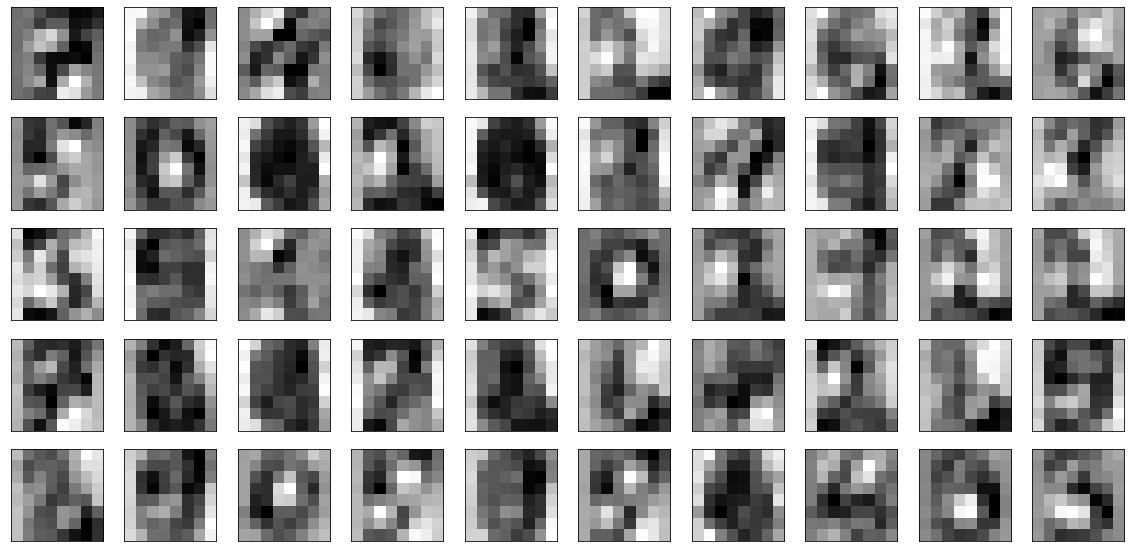

In [8]:
plt.figure(figsize = (20, 20))
for i, comp in enumerate(rbm.components_): #percorre os neuronios e imprime as imagens
  plt.subplot(10, 10, i + 1)
  plt.imshow(comp.reshape((8, 8)), cmap = plt.cm.gray_r)
  plt.xticks(())#retira os valores do eixo x
  plt.yticks(())#retira os valores do eixo y
plt.show()

In [9]:
previsores_rbm = classificador_rbm.predict(previsores_teste)#submete os previsores de teste para a rede testar e encontrar a probabilidade de cada classe entre 0 e 9
previsores_rbm, classe_teste

(array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
        8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
        1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
        7, 6, 8, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
        1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 4,
        3, 4, 8, 9, 7, 9, 8, 2, 1, 9, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 3,
        9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
        6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 1, 9, 9, 6, 1, 0, 4, 1, 6,
        3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
        6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 8, 4, 2, 1, 6, 8, 9,
        2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
        3, 7, 2, 7, 1, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
        9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
        5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 

In [11]:
precisao_rbm = metrics.accuracy_score(previsores_rbm, classe_teste)
precisao_rbm

0.9361111111111111

In [12]:
MLPClassifier_simples = MLPClassifier()#este metodo não utiliza o pipline e logo não utiliza o rbm antes do naive
MLPClassifier_simples.fit(previsores_treinamento, classe_treinamento)
previsores_MLPClassifier = MLPClassifier_simples.predict(previsores_teste)
precisao_MLPClassifier = metrics.accuracy_score(previsores_MLPClassifier, classe_teste)
precisao_MLPClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9805555555555555